In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
lfw_dataset = sklearn.datasets.fetch_lfw_people(min_faces_per_person=100)



Bad key "text.kerning_factor" on line 4 in
C:\ANACONDA3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
X = lfw_dataset.data
Y = lfw_dataset.target
df = pd.DataFrame(lfw_dataset.data)
names = lfw_dataset.target_names
df['target'] = lfw_dataset.target
df['target_names'] = [names[lfw_dataset.target[i]] for i in range(X.shape[0])]
# df['target_names'] = lfw_dataset['target_names']

_,counts = np.unique(Y,return_counts=True)
print('\tClass index\tno. of faces\tClass Name')
for i in range(5):
    print( '\t',str(i),' \t\t',counts[i],'\t\t'+names[i],)
no_of_examples = df.shape[0]
no_of_features = df.shape[1] - 2#because two are just target and target_names 
h,w = lfw_dataset.images[0].shape
no_of_classes = names.shape[0]
print('no_of_examples =',no_of_examples,'\nno_of_features =',no_of_features,'\nheight =',h,' & width =',w)
# df_filtered.head(10)
df.iloc[:,:]

	Class index	no. of faces	Class Name
	 0  		 236 		Colin Powell
	 1  		 121 		Donald Rumsfeld
	 2  		 530 		George W Bush
	 3  		 109 		Gerhard Schroeder
	 4  		 144 		Tony Blair
no_of_examples = 1140 
no_of_features = 2914 
height = 62  & width = 47


,0,1,2,3,4,5,6,7,8,9,...,2906,2907,2908,2909,2910,2911,2912,2913,target,target_names
0,82.666664,87.666664,65.333336,53.000000,97.000000,128.666672,137.666672,145.666672,156.333328,164.333328,...,74.333336,91.000000,107.666664,109.666664,113.666664,106.000000,140.000000,199.333328,2,George W Bush
1,52.333332,49.333332,69.333336,92.333336,123.666664,152.666672,155.333328,158.333328,161.666672,165.000000,...,155.000000,207.000000,220.333328,225.666672,233.333328,235.666672,228.666672,222.000000,3,Gerhard Schroeder
2,37.333332,39.000000,41.666668,52.666668,82.666664,118.000000,127.666664,129.333328,138.333328,141.333328,...,137.666672,117.333336,103.666664,104.000000,106.333336,97.000000,71.666664,59.333332,1,Donald Rumsfeld
3,33.333332,30.666666,31.000000,48.333332,74.666664,92.000000,96.000000,98.000000,102.333336,107.333336,...,123.666664,120.666664,128.333328,146.000000,149.000000,140.666672,129.333328,132.333328,4,Tony Blair
4,169.666672,149.333328,130.333328,145.666672,175.333328,195.333328,203.666672,205.333328,205.666672,210.333328,...,76.666664,88.000000,95.333336,98.000000,101.333336,103.333336,107.000000,110.000000,1,Donald Rumsfeld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,73.333336,73.000000,70.666664,82.333336,119.333336,149.333328,164.333328,174.333328,182.333328,187.333328,...,124.666664,134.333328,143.000000,158.000000,194.666672,230.000000,236.666672,231.333328,4,Tony Blair
1136,69.333336,64.333336,68.666664,92.333336,121.333336,141.666672,150.000000,154.666672,158.333328,159.000000,...,146.000000,136.666672,135.333328,141.000000,140.666672,132.000000,117.000000,115.333336,4,Tony Blair
1137,228.333328,224.333328,216.000000,200.000000,196.333328,186.333328,153.333328,111.666664,82.000000,97.000000,...,129.333328,133.000000,139.333328,143.666672,148.000000,149.666672,145.666672,164.666672,4,Tony Blair
1138,97.666664,118.333336,133.333328,145.000000,147.666672,148.000000,158.333328,165.333328,170.666672,177.333328,...,68.333336,101.666664,158.333328,194.666672,209.666672,219.000000,210.000000,142.000000,2,George W Bush



original shape of train_x = (798, 2914) 
original shape of test_x = (342, 2914)

train_pc and test_pc are the sets when PCA represented each image in terms of new 100 eigenvectors(or eigenfaces):-
Shape of transformed train_X(or train_pc) = (798, 100)
Shape of transformed test_X(or test_pc) = (342, 100)

Variance explained on train set by new 100-D = 0.9183037157340339
Variance explained on test set by new 100-D  = 0.879583620469454

approx_train and approx_test are the inverse transformed images from the train_pc and test_pc :-
approx_train shape = (798, 62, 47)
approx_test shape = (342, 62, 47)
projecting image from train set on eigenfaces space
 [ -175.3612     -1213.9949       663.51086      219.05675
  -330.28915      -29.441689     238.42393     -398.9513
  -184.0242      -103.25718      426.2276       219.84212
   227.60336     -383.97104       78.05695       -8.38377
  -177.83456     -326.1067      -198.33597      136.54306
    14.357193     153.97252     -189.87956     -141.8

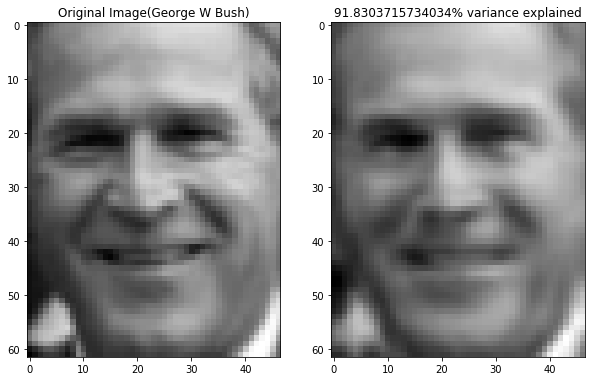

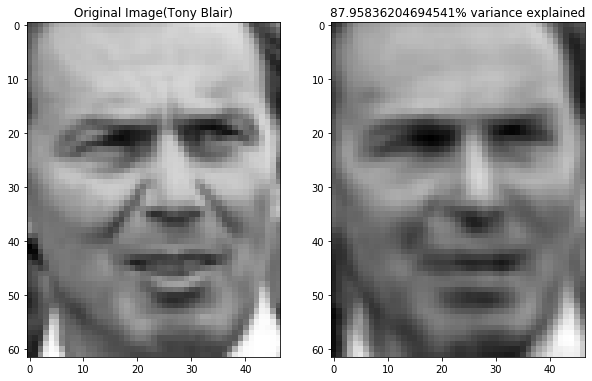

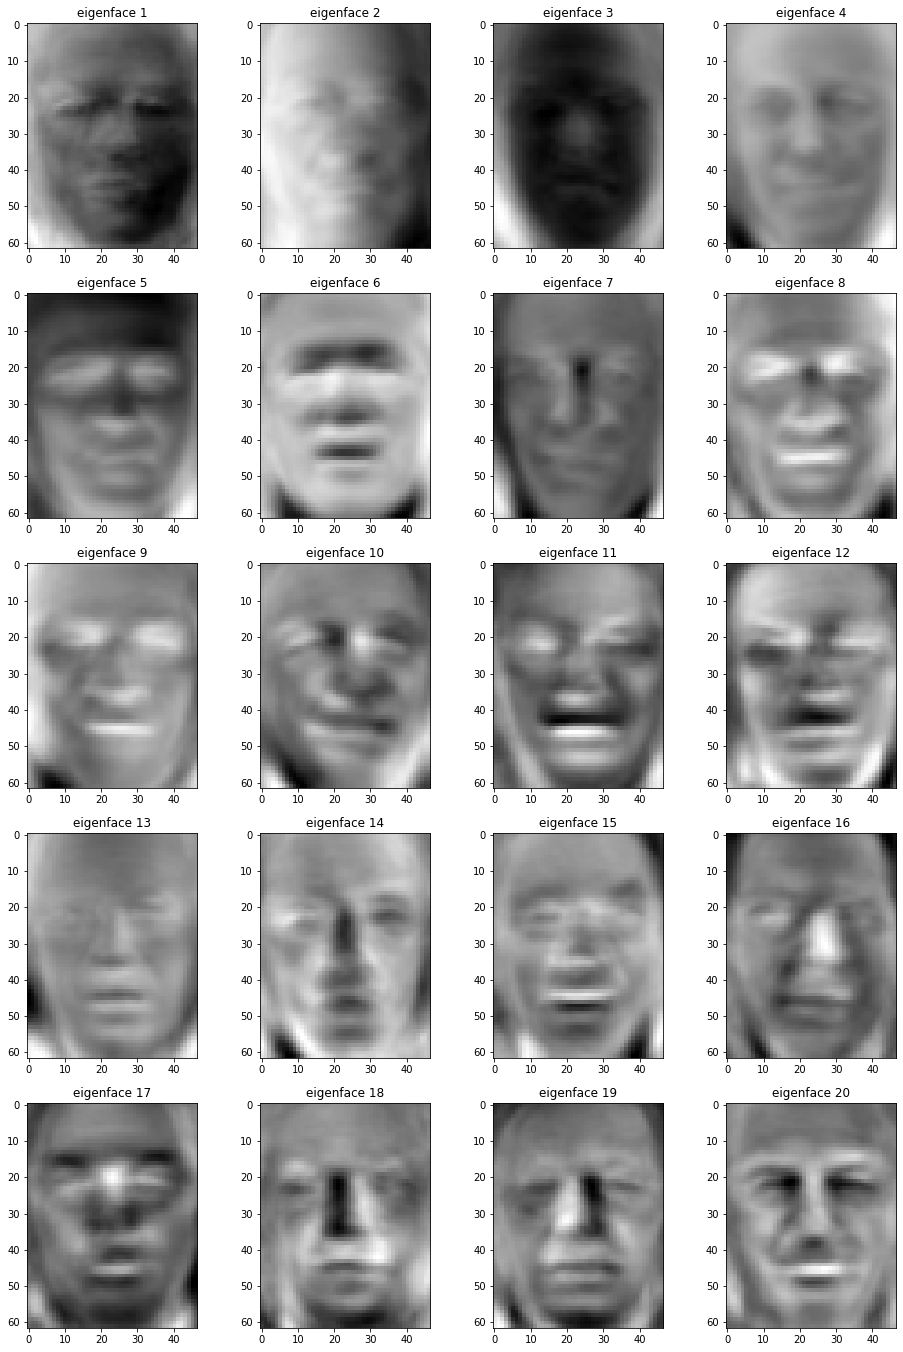

In [3]:
train_x, test_x, train_y,test_y = train_test_split(X,Y,test_size = 0.3,random_state = 1)
print('\noriginal shape of train_x =',train_x.shape,'\noriginal shape of test_x =',test_x.shape)

# #currently no of features are 2914 as size of each image is 62*47 = 2914
# # which needs to be reduced for reducing the number for calulations for training our model.
pca100= PCA(n_components = 100)
pca100.fit(train_x)
train_pc = pca100.transform(train_x)
test_pc = pca100.transform(test_x)
print('\ntrain_pc and test_pc are the sets when PCA represented each image in terms of new 100 eigenvectors(or eigenfaces):-\nShape of transformed train_X(or train_pc) =',train_pc.shape)
print('Shape of transformed test_X(or test_pc) =',test_pc.shape)

train_score_pca100,test_score_pca100= r2_score(train_x, pca100.inverse_transform(train_pc)),r2_score(test_x, pca100.inverse_transform(test_pc))
print("\nVariance explained on train set by new 100-D =",train_score_pca100)
print("Variance explained on test set by new 100-D  =",test_score_pca100)


# projecting the images on eigenface space
approx_train = pca100.inverse_transform(train_pc)
approx_test = pca100.inverse_transform(test_pc)
approx_train = approx_train.reshape(approx_train.shape[0],62,47)
approx_test = approx_test.reshape(approx_test.shape[0], 62, 47)

print('\napprox_train and approx_test are the inverse transformed images from the train_pc and test_pc :-')
print('approx_train shape =',approx_train.shape)
print('approx_test shape =',approx_test.shape)

##### Ploting 1st image

toplot = 1
np.set_printoptions(suppress = True)
print('projecting image from train set on eigenfaces space\n',train_pc[toplot])
plt.figure(figsize=(10,8))
plt.subplot(1,2,1,title = 'Original Image({})'.format(names[train_y[toplot]]))
plt.imshow(train_x[toplot].reshape(62,47),cmap = plt.cm.gray)
plt.subplot(1,2,2,title = '{}% variance explained'.format(train_score_pca100*100))
plt.imshow(approx_train[toplot],cmap = plt.cm.gray)


#plotting 2nd image
toplot = 5
plt.figure(figsize=(10,8))
plt.subplot(1,2,1,title = 'Original Image({})'.format(names[test_y[toplot]]))
plt.imshow(test_x[toplot].reshape(62,47),cmap = plt.cm.gray)
plt.subplot(1,2,2,title = '{}% variance explained'.format(test_score_pca100*100))
plt.imshow(approx_test[toplot],cmap = plt.cm.gray)

eigenfaces = pca100.components_
print('eigenvectors shape =',eigenfaces.shape)
eigenfaces = pca100.components_.reshape((100,h,w)) # eigenfaces are nothing but eigenvector(directions which explain maximum variance) and we get same of eigenfaces as the no of components to represent the data.
plt.figure(figsize=(16,24))
print('eigenfaces shape(after reshaping) =',eigenfaces.shape)
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(eigenfaces[i],cmap = plt.cm.gray)
    plt.title('eigenface '+str(i+1))

Text(0.5, 1.0, 'Mean Face')

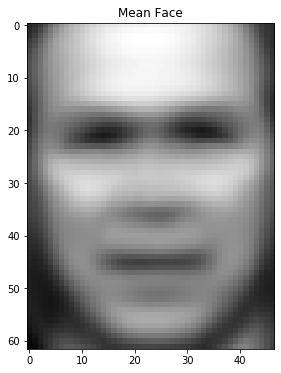

In [4]:
mean_face =[]
for i in range(2914):
    mean_face.append(np.mean(train_x[:,i]))
mean_face = np.array(mean_face)
mean_face = mean_face.reshape(62,47)
plt.figure(figsize = (8,6))
plt.imshow(mean_face,cmap = plt.cm.gray)
plt.title('Mean Face')

Text(0.5, 1.0, '2D scatter plot wrt pc1 and pc2 for PCA applied data')

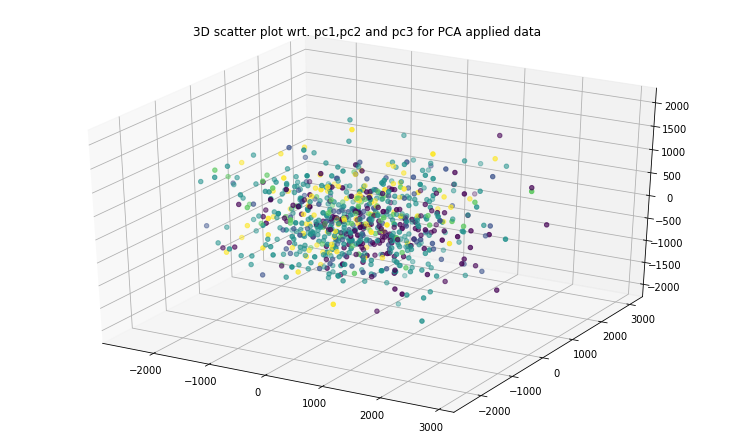

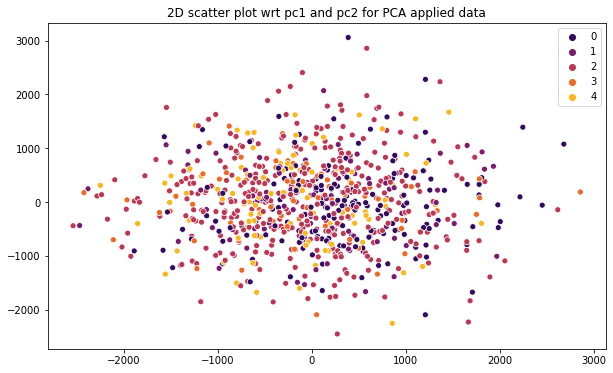

In [5]:
fig =plt.figure(figsize = (10,6))
ax = Axes3D(fig)
ax.scatter(train_pc[:,0],train_pc[:,1],train_pc[:,2],c = train_y)
plt.title('3D scatter plot wrt. pc1,pc2 and pc3 for PCA applied data')
fig =plt.figure(figsize = (10,6))
sns.scatterplot(train_pc[:,0],train_pc[:,1],hue = train_y, palette = sns.color_palette('inferno',5), legend = 'full')
plt.title('2D scatter plot wrt pc1 and pc2 for PCA applied data')

In [6]:
n_neighbors = 11
knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(train_pc,train_y)
print(classification_report(knn.predict(train_pc),train_y))
print(confusion_matrix(knn.predict(train_pc),train_y))
print(classification_report(knn.predict(test_pc),test_y))
print(confusion_matrix(knn.predict(test_pc),test_y))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74       226
           1       0.40      0.67      0.50        58
           2       0.92      0.72      0.81       464
           3       0.16      0.79      0.27        14
           4       0.32      0.86      0.47        36

    accuracy                           0.70       798
   macro avg       0.53      0.74      0.56       798
weighted avg       0.82      0.70      0.74       798

[[147  21  23  15  20]
 [  1  39   5   6   7]
 [ 24  36 334  34  36]
 [  0   0   0  11   3]
 [  0   2   2   1  31]]
              precision    recall  f1-score   support

           0       0.78      0.55      0.65        91
           1       0.43      0.56      0.49        18
           2       0.89      0.70      0.78       211
           3       0.10      1.00      0.17         4
           4       0.21      0.56      0.31        18

    accuracy                           0.65       342
   macro avg   

this is the ratio of total variance of input explained by each PC (upto 100):
 [0.18504757 0.15055564 0.07243592 0.05893918 0.05196268 0.02997181
 0.02445716 0.0221953  0.02017531 0.0198196  0.01514933 0.01462888
 0.01303677 0.01107223 0.01001909 0.00963001 0.00900657 0.0085527
 0.00830037 0.00732865 0.00697003 0.00655209 0.00607294 0.00593163
 0.00566211 0.00516548 0.00488804 0.00463696 0.00453454 0.00412421
 0.00405912 0.00380719 0.00377324 0.00365788 0.0035136  0.00333739
 0.00321314 0.00313268 0.00305839 0.00294016 0.00285341 0.00263028
 0.00255826 0.00253389 0.00246649 0.00244545 0.00240054 0.00237026
 0.00231302 0.00228531 0.0022162  0.00213956 0.00209966 0.00200935
 0.00196493 0.00189068 0.00187201 0.00181588 0.00178071 0.00173204
 0.00168188 0.00166334 0.00164316 0.0016014  0.00157561 0.00153851
 0.00149165 0.00147646 0.00143749 0.00143008 0.0014035  0.00134326
 0.00131298 0.00129182 0.0012768  0.00123494 0.00121908 0.00120838
 0.00118181 0.00117522 0.00113266 0.00112165 0.0010

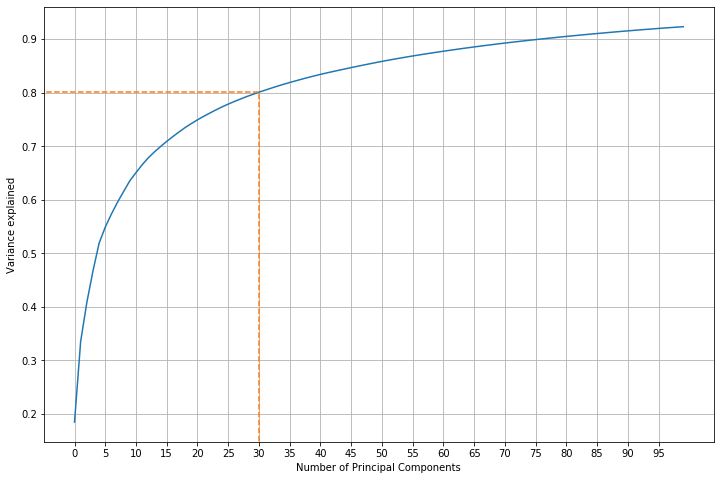

(798, 31) (342, 31)
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       242
           1       0.44      0.67      0.53        64
           2       0.88      0.73      0.80       439
           3       0.19      0.81      0.31        16
           4       0.30      0.78      0.43        37

    accuracy                           0.69       798
   macro avg       0.53      0.72      0.56       798
weighted avg       0.80      0.69      0.72       798

[[148  23  33  15  23]
 [  1  43   8   6   6]
 [ 22  30 320  30  37]
 [  1   0   0  13   2]
 [  0   2   3   3  29]]
              precision    recall  f1-score   support

           0       0.75      0.52      0.61        93
           1       0.39      0.53      0.45        17
           2       0.87      0.69      0.77       208
           3       0.07      0.75      0.13         4
           4       0.26      0.60      0.36        20

    accuracy                           0.63      

In [7]:
#NOW pca100with 80% explained variance
ratio_table = pca100.explained_variance_ratio_
print('this is the ratio of total variance of input explained by each PC (upto 100):\n',ratio_table)
var_exp,i = 0,0
print()
rr = []
while( var_exp<=0.8 and i<100):
    var_exp+=ratio_table[i]
    i+=1
    rr.append(var_exp)
    print('PCs =',i-1,'\t& var_explained =',var_exp)
lim = i-1
while(i<100):
    var_exp+=ratio_table[i]
    i+=1
    rr.append(var_exp)
plt.figure(figsize=(12,8))
xx = np.arange(100)
plt.plot(xx,rr)
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance explained')
xlim,ylim = plt.xlim(), plt.ylim()
plt.plot([xx[lim], xx[lim], xlim[0]], [xlim[0], rr[lim], rr[lim]],
          linestyle="--")
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xticks(np.arange(0,100,5))
plt.show()
#############################    
n_comp = 31
pca31 = PCA(n_comp)
train_pc_new = pca31.fit_transform(train_x)
test_pc_new = pca31.transform(test_x)
print(train_pc_new.shape,test_pc_new.shape)
# print(train_pc[:][5].shape)
knn.fit(train_pc_new,train_y)
print(classification_report(knn.predict(train_pc_new),train_y))
print(confusion_matrix(knn.predict(train_pc_new),train_y))
print(classification_report(knn.predict(test_pc_new),test_y))
print(confusion_matrix(knn.predict(test_pc_new),test_y))